In [1]:
import copy
from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [2]:
training_set = [[(3, 3), 1], [(4, 3), 1], [(1, 1), -1]]
w = [0, 0]
b = 0
history = []


def update(item):
    """
    update parameters using stochastic gradient descent
    :param item: an item which is classified into wrong class
    :return: nothing
    """
    global w, b, history
    w[0] += 1 * item[1] * item[0][0]
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    print(w, b)
    history.append([copy.copy(w), b])
    # you can uncomment this line to check the process of stochastic gradient descent


def cal(item):
    """
    calculate the functional distance between 'item' an the dicision surface. output yi(w*xi+b).
    :param item:
    :return:
    """
    res = 0
    for i in range(len(item[0])):
        res += item[0][i] * w[i]
    res += b
    res *= item[1]
    return res


def check():
    """
    check if the hyperplane can classify the examples correctly
    :return: true if it can
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:
            flag = True
            update(item)
    # draw a graph to show the process
    if not flag:
        print("RESULT: w: " + str(w) + " b: " + str(b))
    return flag


for i in range(1000):
    if not check():
        break

[3, 3] 1
[2, 2] 0
[1, 1] -1
[0, 0] -2
[3, 3] -1
[2, 2] -2
[1, 1] -3
RESULT: w: [1, 1] b: -3


In [3]:
history

[[[3, 3], 1],
 [[2, 2], 0],
 [[1, 1], -1],
 [[0, 0], -2],
 [[3, 3], -1],
 [[2, 2], -2],
 [[1, 1], -3]]

In [11]:
class Perceptron:
    def __init__(self, training_set, history):
        self.training_set = training_set
        self.history = history
        #
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot([], [], 'g', lw=2)
        self.label = self.ax.text([], [], '')

    def init(self):
        """
        initialization function: plot the background of each frame
        :return:
        """
        self.line.set_data([], [])
        x, y, x_, y_ = [], [], [], []
        for p in self.training_set:
            if p[1] > 0:
                x.append(p[0][0])
                y.append(p[0][1])
            else:
                x_.append(p[0][0])
                y_.append(p[0][1])

        self.ax.plot(x, y, 'bo', x_, y_, 'rx')
        plt.axis([-6, 6, -6, 6])
        plt.grid(True)
        self.ax.set_xlabel('x')
        self.ax.set_ylabel('y')
        self.ax.set_title('Perceptron')

        return self.line, self.label

    def animate(self, i):
        """
        animation function.  this is called sequentially
        :param i:
        :return:
        """
        w, b = self.history[i]
        if w[1] == 0:
            return self.line, self.label
        x1 = -7
        y1 = -(b + w[0] * x1) / w[1]
        x2 = 7
        y2 = -(b + w[0] * x2) / w[1]
        self.line.set_data([x1, x2], [y1, y2])
        x1 = 0
        y1 = -(b + w[0] * x1) / w[1]
        self.label.set_text(history[i])
        self.label.set_position([x1, y1])
        return self.line, self.label
    
    def run(self):
        global anim
        anim = animation.FuncAnimation(self.fig, self.animate, init_func=self.init, frames=len(self.history), 
                                       interval=1000, repeat=True, blit=True)
        plt.show()

<IPython.core.display.Javascript object>


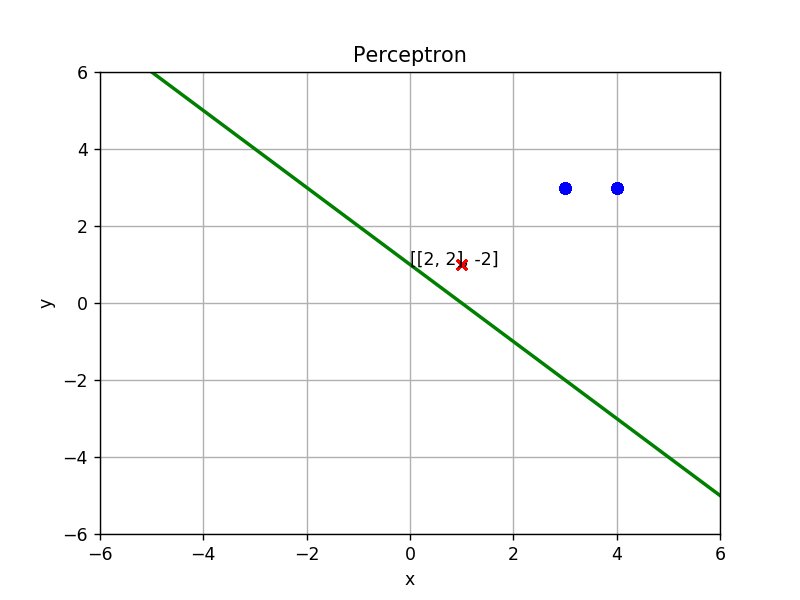

In [12]:
%matplotlib notebook

perc = Perceptron(training_set, history)
perc.run()